Homework Assignment 1
=====================


**Note**:  This is a computable IPython notebook who's source code can be downloaded [here](https://raw.githubusercontent.com/johnfoster-pge-utexas/PGE383-AdvGeomechanics/master/files/assignment1_solution.ipynb).

## Problem 1
 
The motion of a certain continuous medium is defined by the equations
 
\begin{align}
  x_1 &= \frac{1}{2} \left( X_1 + X_2 \right) e^t + \frac{1}{2} \left( X_1-X_2 \right) e^{-t}, \notag \\
  x_2 &= \frac{1}{2} \left( X_1 + X_2 \right) e^t - \frac{1}{2} \left( X_1-X_2 \right) e^{-t}, \notag \\
  x_3 &= X_3 \notag
\end{align}

1. Compute the following

   1. The Green-Lagrange strain tensor $E$
   
   1. The linear (small) strain tensor $\varepsilon$

   Plot the $11$, $22$, and $12$ components of $E$ and $\varepsilon$ on the same figure
   from time $t=0$ to $t=0.05$.
   

1. Compute the following

   1. The rate-of-deformation tensor $D$
   
   1. The rate-of-change of the small strain tensor $\dot{\varepsilon} = \frac{d\varepsilon}{dt}$

   Plot the $11$, $22$, and $12$ components of $D$ and $\dot{\varepsilon}$ on the same figure
   from time $t=0$ to $t=0.05$.
        
        
**Solution**

This cell loads some important packages from sympy, numpy, and matplotlib that I will use the perform calculations and display the results neatly.  In order to run this notebook, you will have to have these packages installed in your Python distribution.

In [1]:
from sympy import *
from sympy.matrices import *
import sympy.mpmath
from sympy.utilities.lambdify import lambdify
init_printing()

import numpy

%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.available
#plt.style.use('bmh')

Defining which variables will be "symbolic" in nature, i.e., they will not take on numerical values.

In [2]:
t, X1, X2, X3 = symbols('t, X_1, X_2, X_3')

This defines the deformation mapping as in the problem statement.

In [3]:
x1 = Rational(1, 2) * (X1 + X2) * exp(t) + Rational(1, 2) * (X1 - X2) * exp(-t)
x2 = Rational(1, 2) * (X1 + X2) * exp(t) - Rational(1, 2) * (X1 - X2) * exp(-t)
x3 = X3

Now we compute the deformation gradient.

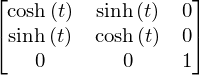

In [4]:
F = simplify(Matrix([[diff(x1, X1), diff(x1, X2), diff(x1, X3)],
            [diff(x2, X1), diff(x2, X2), diff(x2, X3)],
            [diff(x3, X1), diff(x3, X2), diff(x3, X3)]])); F

And the Green-Lagrange strain

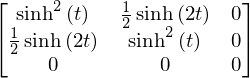

In [5]:
E = Rational(1, 2) * (F.T * F - eye(3)); simplify(E)

We can immediatelly evaluate the linear "small" strain as well, directly with the deformation gradient.

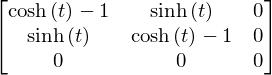

In [6]:
epsilon = simplify(Rational(1,2) * (F.T + F) - eye(3)); simplify(epsilon)

This turns our symbolic output into actual functions of $t$ that we can evaluate and plot

In [7]:
E11_function = lambdify(t, E[0,0], "numpy")
epsilon11_function = lambdify(t, epsilon[0,0], "numpy")

E22_function = lambdify(t, E[1,1], "numpy")
epsilon22_function = lambdify(t, epsilon[1,1], "numpy")

E12_function = lambdify(t, E[0,1], "numpy")
epsilon12_function = lambdify(t, epsilon[0,1], "numpy")

Evaluating the functions

In [9]:
t0 = numpy.linspace(0.0,0.05)

E11 = E11_function(t0)
epsilon11 = epsilon11_function(t0)

E22 = E22_function(t0)
epsilon22 = epsilon22_function(t0)

E12 = E12_function(t0)
epsilon12 = epsilon12_function(t0)

Plotting the results

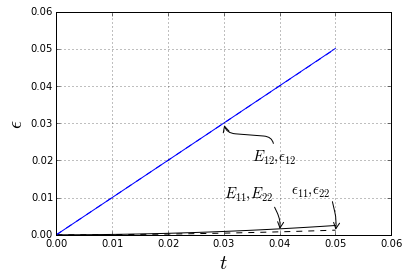

In [10]:
fig = plt.figure(1)
ax = fig.add_subplot(111,xlabel='$t$', ylabel='$\epsilon$')
ax.plot(t0, E22,'k-', t0, epsilon22, 'k--',
         t0, E12,'b-', t0, epsilon12, 'b--');
plt.grid()
ax.annotate('$E_{11}, E_{22}$', xy=(0.04, 0.001),  xycoords='data',
            xytext=(0.03, 0.01), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=20,angleB=80,armB=10,rad=10"),
            fontsize='15'
           )
ax.annotate('$\epsilon_{11}, \epsilon_{22}$', xy=(0.05, 0.0008),  xycoords='data',
            xytext=(0.042, 0.011), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=20,angleB=80,armB=10,rad=10"),
            fontsize='15'
           )
ax.annotate('$E_{12}, \epsilon_{12}$', xy=(0.03, 0.03),  xycoords='data',
            xytext=(0.035, 0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=90,armA=20,angleB=-80,armB=10,rad=10"),
            fontsize='15'
           );
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

Now compute the rate-of-deformation tensor, i.e. the symmetric part of the velocity gradient

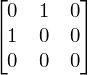

In [11]:
Fdot = F.diff(t);

L = expand(Fdot * F.inv());

D = simplify(Rational(1,2) * (L.T + L)); D

And the linear "small" strain-rate, $\dot{\epsilon}$

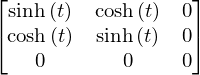

In [12]:
epsilon_dot = epsilon.diff(t); epsilon_dot

Now we will turn the symbolic small strain components into functions that we can evaluate in time. It's not necassary to perform this operation on the rate-of-deformation tensor because it has constant components

In [13]:
epsilon11_dot_function = lambdify(t, epsilon_dot[0,0], "numpy")

epsilon22_dot_function = lambdify(t, epsilon_dot[1,1], "numpy")

epsilon12_dot_function = lambdify(t, epsilon_dot[0,1], "numpy")

Evaluating the functions

In [14]:
D11 = numpy.zeros_like(t0)
epsilon11_dot = epsilon11_dot_function(t0)

D22 = D11
epsilon22_dot = epsilon22_dot_function(t0)

D12 = numpy.ones_like(t0)
epsilon12_dot = epsilon12_dot_function(t0)

Plotting the results

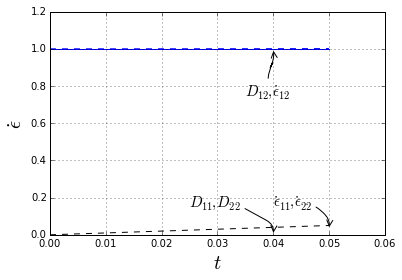

In [15]:
fig = plt.figure(2)
ax = fig.add_subplot(111,xlabel='$t$', ylabel='$\dot{\epsilon}$')
ax.plot(t0, D11,'k-', t0, epsilon11_dot, 'k--',
         t0, D12,'b-', t0, epsilon12_dot, 'b--');
plt.grid()
ax.annotate('$D_{11}, D_{22}$', xy=(0.04, 0.0),  xycoords='data',
            xytext=(0.025, 0.15), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=20,angleB=80,armB=10,rad=10"),
            fontsize='15'
           )
ax.annotate('$\dot{\epsilon}_{11}, \dot{\epsilon}_{22}$', xy=(0.05, 0.03),  xycoords='data',
            xytext=(0.04, 0.15), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=20,angleB=80,armB=10,rad=10"),
            fontsize='15'
           )
ax.annotate('$D_{12}, \dot{\epsilon}_{12}$', xy=(0.04, 1.0),  xycoords='data',
            xytext=(0.035, 0.75), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=90,armA=20,angleB=-80,armB=10,rad=10"),
            fontsize='15'
           );
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

## Problem 2


Given the following stress tensor
$$
\sigma =
\begin{bmatrix}
  36 & 27 & 0 \\
  27 & -36 & 0 \\
  0  & 0  & 18 
\end{bmatrix}
$$

Find:

1. the components of the traction vector acting on a plane with unit normal
   vector $\hat{n}^T = \left[ 2/3, -2/3, 1/3 \right]$

1. the magnitude of the traction vector found in (a)

1. its component in the direction of the normal

1. a. the angle between the traction vector and the normal

**Solution**

Defining the stress tensor and normal vector

In [16]:
sigma = Matrix([[36, 27, 0],[27, -36, 0],[0, 0, 18]])
n = Matrix([Rational(2, 3), Rational(-2, 3), Rational(1, 3)])

The traction vector is then $\vec{t} = \sigma^{T} \hat{n}$ according to the Cauchy stress equation.

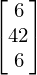

In [17]:
t = sigma.T * n; t

Computing the magnitude

In [18]:
sympy.mpmath.mp.pretty = True
magnitude = sympy.mpmath.norm(t,2); magnitude

42.8485705712571

And the projection in the direction of the normal.

In [19]:
t.T * n

The angle between the normal and the traction vector (in radians)

In [20]:
acos(((t / magnitude).T * n)[0])

or in degree

In [21]:
_ * 180. / numpy.pi

## Problem 3

Given the following stress tensor
$$
\sigma =
\begin{bmatrix}
   18 & 0 & 24 \\
   0 & -50 & 0 \\
   24  & 0  & 32
\end{bmatrix}
$$
    
Find:

1. the principle stresses $\sigma_{I}, \sigma_{II}, \sigma_{III}$

1. the three invariants $I_{1}, I_{2}, I_{3}$

1. the deviatoric stress

1. the two nonzero invariants of the deviatoric stress, i.e. $J_{2}, J_{3}$

**Solution**

Defining the stress tensor

In [22]:
sigma = Matrix([[18, 0, 24],[0, -50, 0],[24, 0, 32]])

Here we use sympy to diagonalize (or find the eigenvalues, they are shown on the diagonal of the matrix.  We then define $\sigma_I > \sigma_{II} > \sigma_{III}$ accordingly.

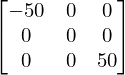

In [23]:
_, D = sigma.diagonalize();
sigma1 = D[2,2];sigma2 = D[1,1]; sigma3 = D[0,0]; D

The first, second, and third invariants

In [24]:
I1 = sigma1 + sigma2 + sigma3; I1

In [25]:
I2 = sigma1 * sigma2 + sigma1 * sigma3 + sigma2 * sigma3; I2

In [26]:
I3 = sigma1 * sigma2 * sigma3; I3

The deviatoric stress

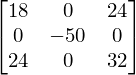

In [27]:
Sij = sigma - 1. / 3. * I1 * eye(3); Sij

Here we perform the same procedure on the deviatoric stress and compute the invariants.

In [28]:
_, D = Sij.diagonalize();
Sij1 = D[2,2]; Sij2 = D[1,1]; Sij3 = D[0,0]; 

J2 = Sij1 * Sij2 + Sij1 * Sij3 + Sij2 * Sij3; J2

In [29]:
J3 = Sij1 * Sij2 * Sij3; J3

## Problem 4

Show that
$$
 \frac{\partial J_2}{\partial \sigma_{ij}} = S_{ij}
$$
where $J_2$ is the second invariant of the deviatoric stress tensor, $S_{ij}$.
    

**Solution**

\begin{align}
\frac{\partial J_2}{\partial \sigma_{ij}} &= \frac{\partial}{\partial \sigma_{ij}}\left(J_2\right) \\
                                          &= \frac{\partial}{\partial \sigma_{ij}}\left(\frac{1}{2}S_{kl}S_{kl}\right) \\
                                          &= \frac{1}{2} \left(\frac{\partial}{\partial \sigma_{ij}}\left(S_{kl}\right)S_{kl} + S_{kl}\frac{\partial}{\partial \sigma_{ij}}\left(S_{kl}\right) \right) \\   
                                          &= S_{kl}\frac{\partial}{\partial \sigma_{ij}}\left(S_{kl}\right) \\
                                          &= S_{kl}\frac{\partial}{\partial \sigma_{ij}}\left(\sigma_{kl} - \frac{1}{3} \sigma_{mm}\delta_{kl}\right) \\
                                          &= S_{kl}\left(\delta_{il}\delta_{kj} - \frac{1}{3} \delta_{im}\delta_{jm}\delta_{kl}\right) \\
                                          &= S_{kl}\left(\delta_{il}\delta_{kj} - \frac{1}{3} \delta_{ij}\delta_{kl}\right) \\
                                          &= S_{ij} - \frac{1}{3} S_{kk} \delta_{ij} \\
                                          &= S_{ij}
\end{align}        

because

$$
S_{kk} =0
$$

by definition of $S$ being a deviatoric tensor.

## Problem 5
 
For each of the following stress states (values not given are zero), plot the three Mohr's circles and
determine the maximum shear stress.
    
1. Uniaxial tension $\sigma_{11} = 40$

1. Biaxial stress $\sigma_{11} = -10, \sigma_{22} = 30$

1. Hydrostatic tension of magnitude 100 psi
    
1. $\sigma_{11} = -60, \sigma_{22} = 100, \sigma_{33} = 40$

1. $\sigma_{11} = 10, \sigma_{22} = 40, \sigma_{21} = \sigma_{12} = 20$


**Solution**

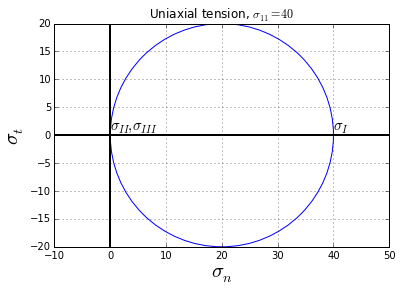

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111,xlabel='$\sigma_n$', ylabel='$\sigma_t$',title='Uniaxial tension, $\sigma_{11}=40$')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.annotate('$\sigma_{II},\sigma_{III}$', xy=(0.04, 1.0),  xycoords='data', fontsize='15');
ax.annotate('$\sigma_{I}$', xy=(40, 1.0),  xycoords='data', fontsize='15');
circ = plt.Circle((0.5*(40-0), 0), radius=20, fill=False, color='b')
ax.add_patch(circ)
plt.axis('equal')
plt.grid()
plt.show()

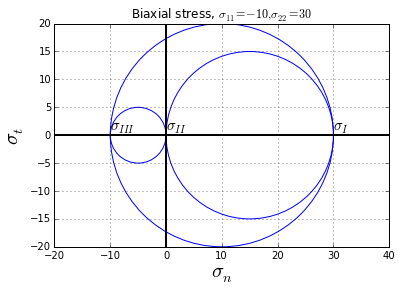

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111,xlabel='$\sigma_n$', ylabel='$\sigma_t$',title='Biaxial stress, $\sigma_{11}=-10, \sigma_{22}=30$')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.annotate('$\sigma_{III}$', xy=(-10, 1.0),  xycoords='data', fontsize='15');
ax.annotate('$\sigma_{II}$', xy=(0.04, 1.0),  xycoords='data', fontsize='15');
ax.annotate('$\sigma_{I}$', xy=(30, 1.0),  xycoords='data', fontsize='15');
circ1 = plt.Circle((0.5*(30+(-10)), 0), radius=20, fill=False, color='b')
circ2 = plt.Circle((0.5*(30+(0)), 0), radius=15, fill=False, color='b')
circ3 = plt.Circle((-5, 0), radius=5, fill=False, color='b')
ax.add_patch(circ1)
ax.add_patch(circ2)
ax.add_patch(circ3)
plt.axis('equal')
plt.grid()
plt.show()

**For the hydostatic tension case, there are no Mohr's circles to draw because $\sigma_I = \sigma_{II} =  \sigma_{III}$**

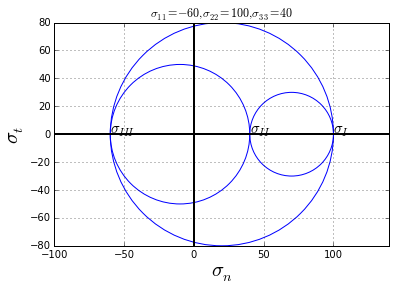

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111,xlabel='$\sigma_n$', ylabel='$\sigma_t$',
                     title='$\sigma_{11} = -60, \sigma_{22} = 100, \sigma_{33} = 40$')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.annotate('$\sigma_{III}$', xy=(-60, 1.0),  xycoords='data', fontsize='15');
ax.annotate('$\sigma_{II}$', xy=(40, 1.0),  xycoords='data', fontsize='15');
ax.annotate('$\sigma_{I}$', xy=(100, 1.0),  xycoords='data', fontsize='15');
circ1 = plt.Circle((0.5*(100+(-60)), 0), radius=80, fill=False, color='b')
circ2 = plt.Circle((70, 0), radius=30, fill=False, color='b')
circ3 = plt.Circle((-10, 0), radius=50, fill=False, color='b')
ax.add_patch(circ1)
ax.add_patch(circ2)
ax.add_patch(circ3)
plt.axis('equal')
plt.grid()
plt.show()

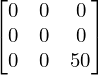

In [33]:
sigma = Matrix([[10,20,0],[20,40,0],[0,0,0]])
_, D = sigma.diagonalize(); D

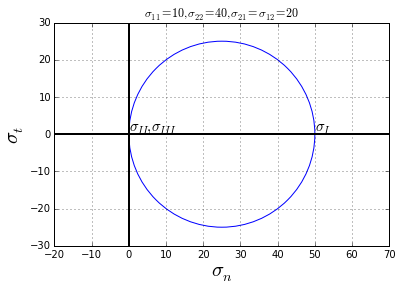

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111,xlabel='$\sigma_n$', ylabel='$\sigma_t$',
                     title='$\sigma_{11} = 10, \sigma_{22} = 40, \sigma_{21} = \sigma_{12} = 20$')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.annotate('$\sigma_{II},\sigma_{III}$', xy=(0.04, 1.0),  xycoords='data', fontsize='15');
ax.annotate('$\sigma_{I}$', xy=(50, 1.0),  xycoords='data', fontsize='15');
circ = plt.Circle((0.5*(50-0), 0), radius=25, fill=False, color='b')
ax.add_patch(circ)
plt.axis('equal')
plt.grid()
plt.show()